In [1]:
import warnings
warnings.filterwarnings('ignore')
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset
df = pd.read_csv( "flight_train.csv" )

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
len(df)

55000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [6]:
# Null values should be addressed before addressing Outliers for numeric Columns
# Also Null values will impact when plotting data
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [7]:
# ADdress Age Column with Null Values
#df1 = df[~df.AGE.isnull()]
#plt.hist(df1['AGE'])
#df1['AGE'].describe()
# Replace Age with its median value, because it has outliers which will impact mean
df['AGE']=df['AGE'].fillna(df['AGE'].median())

In [8]:
# Similarly check for sum yr 1 & 2
#df1 = df[~df.SUM_YR_1.isnull()]
#df1 = df1[df.SUM_YR_1 < 25000]
#plt.hist(df1['SUM_YR_1'])
#df1['SUM_YR_1'].describe()
df['SUM_YR_1']=df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean())
df['SUM_YR_2']=df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean())

In [9]:
# Similarly address Null values in categorical columns with most frequent value
#print(df['GENDER'].value_counts())
df['GENDER'].fillna(df['GENDER'].value_counts().index[0],inplace=True)
#print(df['GENDER'].value_counts())

In [10]:
# Similarly address Null values in categorical columns with most frequent value
#print(df['WORK_COUNTRY'].value_counts())
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].value_counts().index[0],inplace=True)
#print(df['WORK_COUNTRY'].value_counts().head(10))
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].value_counts().index[0],inplace=True)

In [11]:
# Drop city as there are no max values and all seems to be equal, So drop blanck rows with city
df.dropna(subset=['WORK_CITY'], how='all', inplace=True)

In [12]:
# Code to get numeric & categorical data
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
numeric_data.head()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
2,55106,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,21189,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,39546,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39
5,56972,6,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,52,10,0.967692,343121,15


In [13]:
# ADdress Outliers in all numeric columns. But before that check whether the variables are normally distributed.
# If not then transform them.
# Then check for outliers and address them

# Function to transform Numeric Variables
def transVariable(coln, df):
    from sklearn.preprocessing import FunctionTransformer
    log_transform = FunctionTransformer(np.log, validate=True)
    cols=[coln]
    df[cols] = log_transform.transform(df[cols])
    plt.hist(df[cols])
    
# Function to detect Outliers
def outlier_detection(coln):
    Q1 = np.percentile(coln, 25,interpolation = 'midpoint')
    Q3 = np.percentile(coln, 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = coln >= (Q3+1.5*IQR)
    outlier=list(np.where(upper)[0])
    lower = coln <= (Q1-1.5*IQR)
    for each in list(np.where(lower)[0]):
        if each not in outlier:
            outlier.append(each)
    print("Outlier Count:", len(outlier))
    
# Function Outlier deletion
indices = []
def outlier_delete(coln):
    Q1 = np.percentile(coln, 25, interpolation = 'midpoint')
    Q3 = np.percentile(coln, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = coln >= (Q3+1.5*IQR) 
    lower = coln <= (Q1-1.5*IQR)
    upp=[]
    for i in list(upper.index):
        if upper[i]==True:
            upp.append(i)
    for i in upp:
        df.drop(i,inplace=True)
    low=[]
    for i in list(lower.index):
        if lower[i]==True:
            low.append(i)
    for i in low:
        df.drop(i,inplace=True)

(array([2.5000e+01, 7.4600e+02, 1.7029e+04, 2.0868e+04, 1.0456e+04,
        3.2360e+03, 6.1300e+02, 5.9000e+01, 1.0000e+00, 1.0000e+00]),
 array([  6. ,  16.4,  26.8,  37.2,  47.6,  58. ,  68.4,  78.8,  89.2,
         99.6, 110. ]),
 <BarContainer object of 10 artists>)

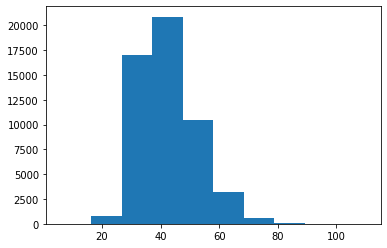

In [14]:
# Check if AGE is normally distributed
plt.hist(df['AGE'])
# No action needed

In [15]:
# Check for outliers in AGE
outlier_detection(df['AGE'])

Outlier Count: 807


In [16]:
# Delet outliers from Age
outlier_delete(df['AGE'])

In [17]:
# Check for outliers in AGE
outlier_detection(df['AGE'])

Outlier Count: 0


(array([4.9596e+04, 2.2480e+03, 3.1300e+02, 4.8000e+01, 1.5000e+01,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1380. ,  59313.7, 117247.4, 175181.1, 233114.8, 291048.5,
        348982.2, 406915.9, 464849.6, 522783.3, 580717. ]),
 <BarContainer object of 10 artists>)

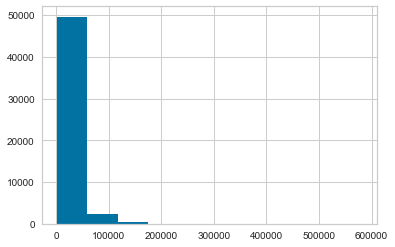

In [16]:
# Check if SEG_KM_SUM is normally distributed
plt.hist(df['SEG_KM_SUM'])

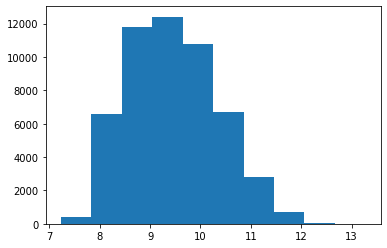

In [18]:
# Transform SEG_KM_SUM if it is transformable. If not leave it.
transVariable('SEG_KM_SUM',df)

In [18]:
# Check for outliers in SEG_KM_SUM
outlier_detection(df['SEG_KM_SUM'])

Outlier Count: 71


In [19]:
# Delete Outliers
outlier_delete(df['SEG_KM_SUM'])

In [20]:
# Check for outliers in SEG_KM_SUM
outlier_detection(df['SEG_KM_SUM'])

Outlier Count: 3


In [21]:
# Take all columns except date column to a new dataframe
cols = df.columns.values.tolist()
cols = ['GENDER','FFP_TIER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2',
 'SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum', 'Point_NotFlight']
df_k=df[cols]
df_k.head()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
16,Male,6,wulumuqi,xinjiang,CN,48.0,101,219995,93840.0,93114.0,12.056592,7,6.840000,41,15,1.386525,257193,22
18,Male,6,wulumuqishi,xinjiang,CN,54.0,64,215013,99735.0,93006.0,12.039770,2,11.206349,48,16,1.401596,249914,23
20,Male,6,.,beijing,CN,49.0,106,220641,69566.0,122763.0,12.026426,4,6.438095,31,4,1.369404,251134,9
27,Male,6,.,beijing,CN,47.0,74,209810,101398.0,83139.0,11.909585,11,9.493151,51,8,1.433364,235176,14
28,Male,6,guangzhou,guangdong,CN,62.0,101,209362,94055.0,107896.0,11.977470,18,7.080000,29,3,1.338170,237787,11


In [22]:
# get df_k encoded, so as to get the K value
ob=[]
for data in df_k:
    if df_k[data].dtype=='object':
        ob.append(data)

from sklearn.preprocessing import LabelEncoder
for dt in ob:
    l=LabelEncoder()
    df_k[dt]=l.fit_transform(df_k[dt])
df_k.head()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
16,1,6,2608,976,22,48.0,101,219995,93840.0,93114.0,12.056592,7,6.840000,41,15,1.386525,257193,22
18,1,6,2610,976,22,54.0,64,215013,99735.0,93006.0,12.039770,2,11.206349,48,16,1.401596,249914,23
20,1,6,5,726,22,49.0,106,220641,69566.0,122763.0,12.026426,4,6.438095,31,4,1.369404,251134,9
27,1,6,5,726,22,47.0,74,209810,101398.0,83139.0,11.909585,11,9.493151,51,8,1.433364,235176,14
28,1,6,1833,781,22,62.0,101,209362,94055.0,107896.0,11.977470,18,7.080000,29,3,1.338170,237787,11


In [23]:
df_k.isnull().sum()

GENDER             0
FFP_TIER           0
WORK_CITY          0
WORK_PROVINCE      0
WORK_COUNTRY       0
AGE                0
FLIGHT_COUNT       0
BP_SUM             0
SUM_YR_1           0
SUM_YR_2           0
SEG_KM_SUM         0
LAST_TO_END        0
AVG_INTERVAL       0
MAX_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

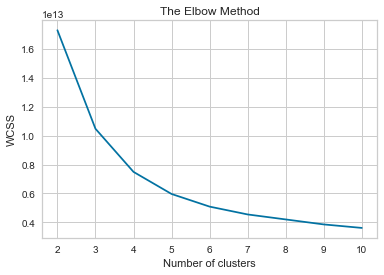

In [24]:
# 1. Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_k)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# we are not able to find an idle K here, so we will try silhouette method


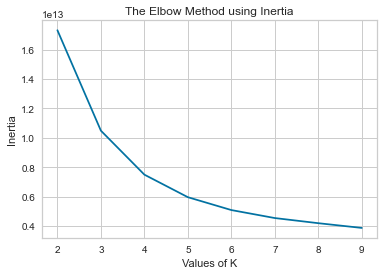

In [25]:
# 2. Using the elbow method to find the optimal number of clusters
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_k)
    kmeanModel.fit(df_k)
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

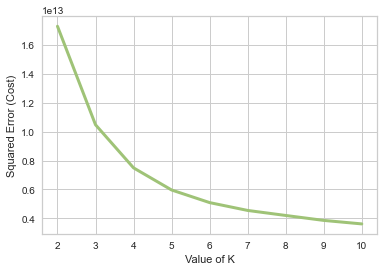

In [26]:
# 3. Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
cost =[]
for i in range(2, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(df_k)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
    
# plot the cost against K values
plt.plot(range(2, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

In [27]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52156 entries, 16 to 54999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           52156 non-null  int32  
 1   FFP_TIER         52156 non-null  int64  
 2   WORK_CITY        52156 non-null  int32  
 3   WORK_PROVINCE    52156 non-null  int32  
 4   WORK_COUNTRY     52156 non-null  int32  
 5   AGE              52156 non-null  float64
 6   FLIGHT_COUNT     52156 non-null  int64  
 7   BP_SUM           52156 non-null  int64  
 8   SUM_YR_1         52156 non-null  float64
 9   SUM_YR_2         52156 non-null  float64
 10  SEG_KM_SUM       52156 non-null  float64
 11  LAST_TO_END      52156 non-null  int64  
 12  AVG_INTERVAL     52156 non-null  float64
 13  MAX_INTERVAL     52156 non-null  int64  
 14  EXCHANGE_COUNT   52156 non-null  int64  
 15  avg_discount     52156 non-null  float64
 16  Points_Sum       52156 non-null  int64  
 17  Point_NotFl

In [28]:
pip install --upgrade threadpoolctl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.  Downloading threadpoolctl-3.1.0-py3-none-any.whl (14 kB)



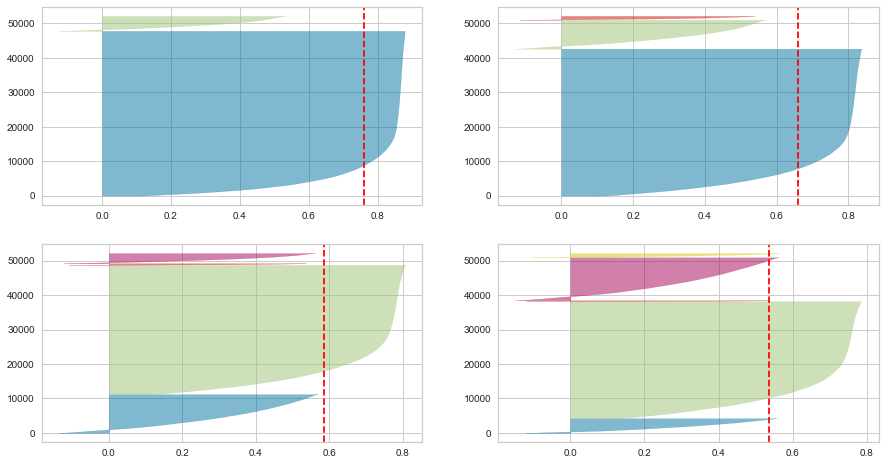

In [28]:
# 1. Using the Silhouette method to find the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,8))
j=0
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q=[0,0,1,1]
    mod=[0,1,0,1]
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q[j]][mod[j]])
    visualizer.fit(df_k)
    j=j+1


In [31]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state = 42)
kmeans.fit(df_k)
pred = kmeans.predict(df_k)

In [32]:
frame = pd.DataFrame(df_k)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    47821
1     4335
Name: cluster, dtype: int64